## Actividad 5_V2

**Punto 9 de la actividad 5. Hacemos un data frame con la info del punto 7 para todas las galaxias de la simulación con masa mayor a 1e10**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import Curves2D

In [2]:
pwd = os.getcwd()

Cargamos la tabla de datos que descargamos:

In [3]:
columnas = ['GalaxyID','GroupID','CentreOfPotential_x','CentreOfPotential_y','CentreOfPotential_z','Stars_Mass','HalfMassRad_Star']

In [4]:
table   = pd.read_csv('Aperturas_RefL0100N1504_snap_28_aperture_30.dat',usecols=columnas)#,index_col='GalaxyID')

In [5]:
table

,GalaxyID,GroupID,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,HalfMassRad_Star
0,9498012,28000000000002,8.913222,35.828056,54.839039,1.538708e+11,8.828579
1,9508202,28000000000002,6.904262,35.705917,57.397373,7.604099e+10,5.646945
2,9512113,28000000000002,8.682913,35.504921,54.217369,1.345128e+11,8.825949
3,9517736,28000000000002,8.278317,37.063808,54.914932,2.232997e+10,4.576159
4,9519365,28000000000002,8.262937,36.454063,55.901993,4.833353e+10,9.249007
...,...,...,...,...,...,...,...
13295,4317555,28000100003223,17.477247,79.643379,54.909241,2.390242e+09,3.844911
13296,4710749,28000100004466,58.681110,84.345787,24.601583,1.280501e+09,3.716805
13297,5387790,28000200000262,70.492355,5.389233,91.000664,1.631883e+09,6.105383
13298,6104686,28000200004222,12.975779,81.673553,52.292992,2.849959e+09,4.940019


In [10]:
table_a = table[(table['Stars_Mass']>=1e10)].copy()
table_a

,GalaxyID,GroupID,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,HalfMassRad_Star
0,9498012,28000000000002,8.913222,35.828056,54.839039,1.538708e+11,8.828579
1,9508202,28000000000002,6.904262,35.705917,57.397373,7.604099e+10,5.646945
2,9512113,28000000000002,8.682913,35.504921,54.217369,1.345128e+11,8.825949
3,9517736,28000000000002,8.278317,37.063808,54.914932,2.232997e+10,4.576159
4,9519365,28000000000002,8.262937,36.454063,55.901993,4.833353e+10,9.249007
...,...,...,...,...,...,...,...
13131,10365607,28000000002202,35.516003,10.797990,34.600616,1.226640e+10,4.841568
13145,10859653,28000000002570,61.355499,48.616516,65.236801,1.094640e+10,5.472824
13155,11104654,28000000002905,97.197350,82.709518,43.676567,1.200869e+10,4.417672
13164,11247394,28000000003127,88.764885,47.226864,81.905136,1.186733e+10,10.748503


In [16]:
# n = 2                              #Como prueba tomo los primeros 50 valores de la tabla
long = len(table_a)                    #Acá tomo todas las galáxias mayores a 1e10 masas solares para armarnos la tabla del punto 7
     
data = {'GalaxyID_test':[],'GroupID_test':[],'GalaxyID_V1':[],'GalaxyID_V2':[],'R_1':[],'R_2':[],'r_sep_1':[],'r_sep_2':[],
        'mu_1':[],'mu_2':[],'N_1':[],'N_2':[],'N_3':[]}#Defino las columnas de output
DATA = pd.DataFrame(data=data)

for i in np.arange(long):
    
    mask   = (table_a['GalaxyID']==int(table_a['GalaxyID'].to_numpy()[i]))  #usamos como máscara la galáxia i-ésima de la table_a
    G_test = float(table_a['Stars_Mass'][mask])                       #masa de la galáxia
    x_test = float(table_a['CentreOfPotential_x'][mask])                     #nos guardamos su posición
    y_test = float(table_a['CentreOfPotential_y'][mask])
    z_test = float(table_a['CentreOfPotential_z'][mask])
    
    table_b = table_a[((table_a['Stars_Mass']/G_test)>0.1)].copy() #tabla para masas acotadas respecto de la i-ésima
    
    table_b['Distancias_test'] = np.sqrt( (table_b['CentreOfPotential_x'].to_numpy()-x_test)**2
                                         +(table_b['CentreOfPotential_y'].to_numpy()-y_test)**2
                                         +(table_b['CentreOfPotential_z'].to_numpy()-z_test)**2)    #Nueva columna que tiene las distancias a la i-ésima
    
    table_b = table_b.sort_values(by=['Distancias_test'],ascending=True)
    
    N_1 = len(table_b[(table_b['Distancias_test']<=1)])-1
    N_2 = len(table_b[(table_b['Distancias_test']<=2)])-1
    N_3 = len(table_b[(table_b['Distancias_test']<=3)])-1
    
    r_sep_1= table_b['Distancias_test'].to_numpy()[1]/(table_b['HalfMassRad_Star'].to_numpy()[0]/1000+table_b['HalfMassRad_Star'].to_numpy()[1]/1000) 
    r_sep_2= table_b['Distancias_test'].to_numpy()[2]/(table_b['HalfMassRad_Star'].to_numpy()[0]/1000+table_b['HalfMassRad_Star'].to_numpy()[2]/1000)
    
    
    mu_1 = table_b['Stars_Mass'].to_numpy()[1]/table_b['Stars_Mass'].to_numpy()[0]
    mu_2 = table_b['Stars_Mass'].to_numpy()[2]/table_b['Stars_Mass'].to_numpy()[0]
    
#     vecinos = len(N_2)-1
    
    data = {'GalaxyID_test':table_b['GalaxyID'].to_numpy()[0],'GroupID_test':table_b['GroupID'].to_numpy()[0],
        'GalaxyID_V1':table_b['GalaxyID'].to_numpy()[1],'GalaxyID_V2':table_b['GalaxyID'].to_numpy()[2],
        'R_1':table_b['Distancias_test'].to_numpy()[1],'R_2':table_b['Distancias_test'].to_numpy()[2],
        'r_sep_1':r_sep_1,'r_sep_2':r_sep_2,'mu_1':mu_1,'mu_2':mu_2,'N_1':N_1,'N_2':N_2,'N_3':N_3}
    
    DATA = DATA.append(data,ignore_index=True)
    
    print('Porcentaje:',round(float((i+1)/long),3),end='\r')

DATA = DATA.astype({'GalaxyID_test':int,'GroupID_test':int,'GalaxyID_V1':int,
                    'GalaxyID_V2':int,'R_1':float,'R_2':float,'r_sep_1':float,
                     'r_sep_2':float,'mu_1':float,'mu_2':float,'N_1':int,'N_2':int,'N_3':int})      #Cambiamos el tipo de dato por columna
        

Imprimimos la tabla para ver que todo está bien:

In [17]:
DATA

,GalaxyID_test,GroupID_test,GalaxyID_V1,GalaxyID_V2,R_1,R_2,r_sep_1,r_sep_2,mu_1,mu_2,N_1,N_2,N_3
0,9498012,28000000000002,9532694,3461244,0.505941,0.518791,40.259414,48.797400,0.649263,0.125630,18,35,41
1,9508202,28000000000002,9562859,14910180,0.257705,0.463580,21.223224,33.711917,0.315459,0.823968,3,3,15
2,9512113,28000000000002,3467928,9554089,0.150475,0.231956,13.328678,18.674313,0.120308,0.314345,20,34,40
3,9517736,28000000000002,9537911,9542932,0.423763,0.677967,37.490817,56.695098,1.999591,1.722059,2,35,52
4,9519365,28000000000002,9542932,9539937,0.634224,0.952579,38.135130,67.823802,0.795587,0.615451,2,34,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,18478750,18181888,1.911730,3.737239,212.966353,260.881095,2.058146,2.369121,0,1,1
3634,10859653,28000000002570,9779252,9744960,1.526021,5.217671,148.669482,531.640719,2.014763,1.325153,0,1,1
3635,11104654,28000000002905,9034191,10942165,1.503464,2.124332,167.615303,244.177300,1.657043,0.965701,0,1,2
3636,11247394,28000000003127,18043220,13249045,2.053687,2.693730,123.996389,183.269247,4.079843,1.619644,0,0,3


También podemos oredenarlas por la cantidad de vecinos que tengan:

In [11]:
DATA.sort_values(by=['r_sep_1'],ascending=True).head(20) # En éste caso son las 20 con mayor cantidad de vecinos

,GalaxyID_test,GroupID_test,GalaxyID_V1,GalaxyID_V2,R_1,R_2,r_sep_1,r_sep_2,mu_1,mu_2,N_1,N_2,N_3
456,3436883,28000000000002,21573586,3456595,0.022942,0.055859,0.151136,9.897639,60.546007,0.931451,28,44,52
1539,9479185,28000000000001,8230966,9463307,0.011185,0.139386,0.160178,19.918006,0.725565,0.862289,16,28,51
837,8230966,28000000000001,9479185,9463307,0.011185,0.130458,0.160178,1.828872,1.378236,1.188437,16,28,50
457,3456595,28000000000002,21573586,3436883,0.042418,0.055859,0.276193,9.897639,65.001851,1.073594,28,44,52
1501,65695,28000000000000,21109760,56965,0.026003,0.051614,0.332458,13.442388,84.251276,1.048732,25,35,50
2218,10586237,28000000000003,21730535,3550457,0.058006,0.099999,0.444520,18.735105,16.276223,0.103513,27,46,54
777,124303,28000000000001,21379521,127771,0.092964,0.127569,0.446405,21.749504,44.604437,0.833957,34,65,88
32,1,28000000000000,21242350,42233,0.038289,0.142329,0.501191,27.024769,25.058664,0.339860,24,37,45
290,4476932,28000000000004,21924775,4461431,0.082835,0.090761,0.502380,10.825181,36.055507,1.931206,26,41,46
2568,10736949,28000000000006,19182761,4561773,0.163511,0.244855,0.505181,31.111777,20.991998,0.724450,12,16,23


In [12]:
# DATA.to_csv(path_or_buf= pwd+'/Actividad_5_v2_Parte_2.dat',index=False)   # Nos guardamos los datos

## Scatter plots de una galaxia central junto con las que se encuantran a menos de 2Mpc

Tomamos el GalaxyID de la galáxia central que queremos graficar, que podemos sacarlo de la tabla DATA de arriba:

In [9]:
GalaxyID_test = 2721236

In [10]:
mask = (table_a['GalaxyID']== GalaxyID_test)

G_test = float(table_a['Stars_Mass'][mask])

xmax = table_a['CentreOfPotential_x'][mask]
ymax = table_a['CentreOfPotential_y'][mask]
zmax = table_a['CentreOfPotential_z'][mask]

table_b = table_a[((table_a['Stars_Mass']/G_test)>0.1)].copy()

table_b['Distancias_test'] = np.sqrt((table_b['CentreOfPotential_x']-float(xmax))**2
                                    +(table_b['CentreOfPotential_y']-float(ymax))**2
                                    +(table_b['CentreOfPotential_z']-float(zmax))**2)

N_2 = table_b[(table_b['Distancias_test']<=2)].sort_values(by=['Distancias_test'],ascending=True).copy()

**Eje x-y del C.O.P**

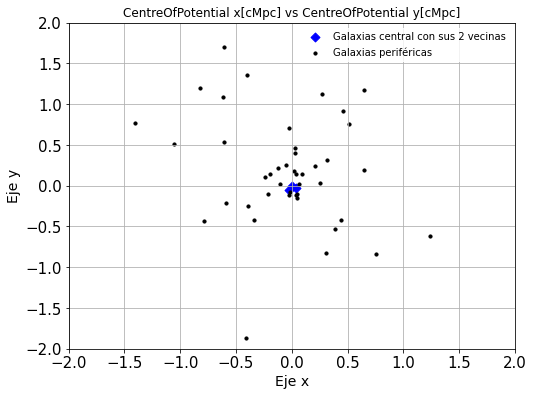

In [11]:
eje_1 = 'x'
eje_2 = 'y'

fig,ax=plt.subplots(figsize=(8,6))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(ymax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(ymax)


ax.scatter(xvar_1,yvar_1,marker='D',s=40,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=10,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

**Eje x-z del C.O.P**

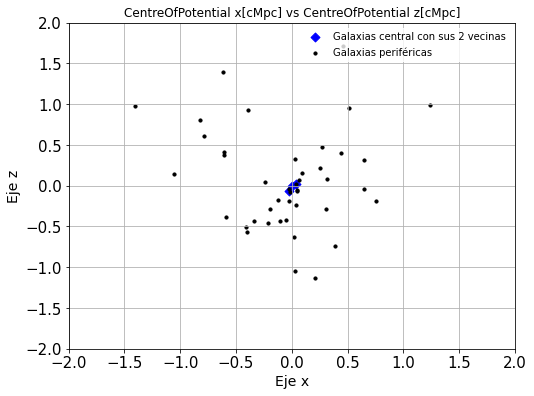

In [12]:
eje_1 = 'x'
eje_2 = 'z'

fig,ax=plt.subplots(figsize=(8,6))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(zmax)


ax.scatter(xvar_1,yvar_1,marker='D',s=40,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=10,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

**Eje y-z del C.O.P**

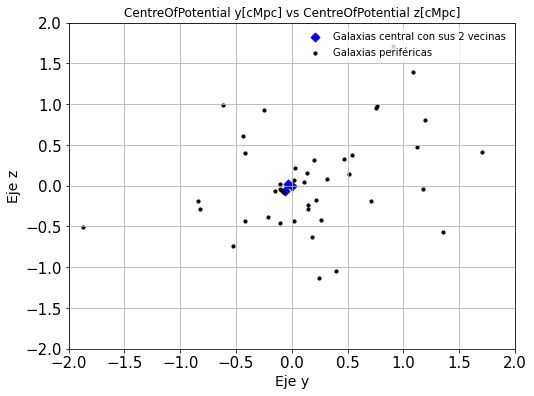

In [13]:
eje_1 = 'y'
eje_2 = 'z'

fig,ax=plt.subplots(figsize=(8,6))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(ymax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(ymax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(zmax)

ax.scatter(xvar_1,yvar_1,marker='D',s=40,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=10,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

**Ploteo en 3D**

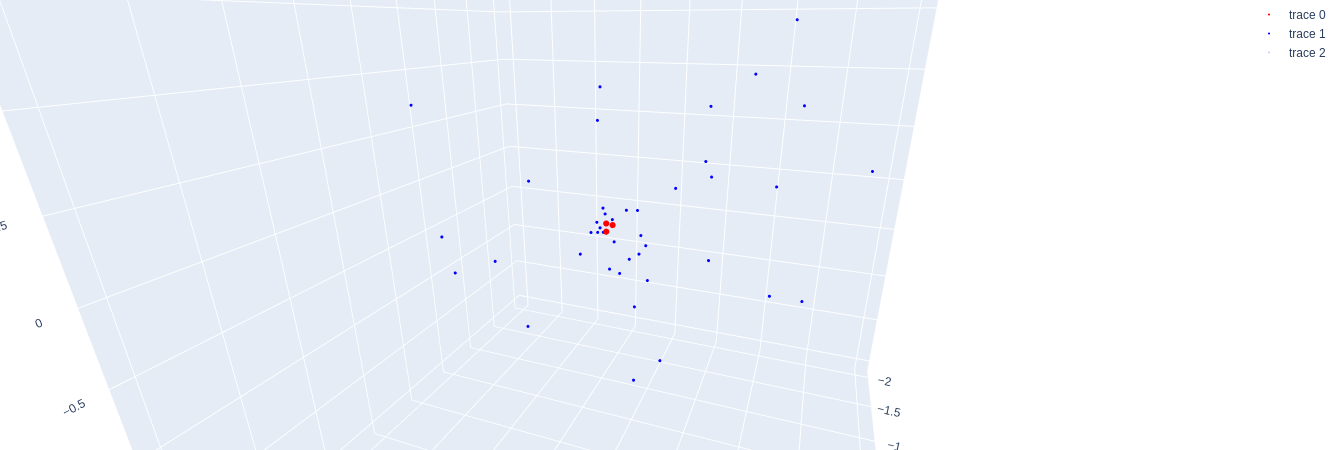

In [15]:
xvar_1= N_2['CentreOfPotential_x'].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_y'].iloc[0:3]-float(ymax)
zvar_1= N_2['CentreOfPotential_z'].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_x'].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_y'].iloc[3:]-float(ymax)
zvar_2= N_2['CentreOfPotential_z'].iloc[3:]-float(zmax)

x_lim = [-2,2]
y_lim = [-2,2]
z_lim = [-2,2]

fig = go.Figure(data=[go.Scatter3d(
    x=xvar_1,
    y=yvar_1,
    z=zvar_1,
    mode='markers',
    marker=dict(
        size = 2,
        color='red',
        opacity=1
    )
    ),go.Scatter3d(
        x=xvar_2,
        y=yvar_2,
        z=zvar_2,
        mode='markers',
        marker=dict(
        size = 1,
        color='blue',
        opacity=1
    )      
    ),go.Scatter3d(
        x=x_lim,
        y=y_lim,
        z=z_lim,
        mode='markers',
        marker=dict(
        size=0,
        color='blue',
        opacity=0.01))
                     ])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='C.O.P X[Mpc]',
                    yaxis_title='C.O.P Y[Mpc]',
                    zaxis_title='C.O.P Z[Mpc]'),
                    width=70,
                    margin =dict(l=0, r=0, b=0, t=0))



fig.show()


## 11) Para la muestra C, realizar histrogramas de r1, r2, rsep2, μBGT y N2

In [16]:
R_1 = DATA['R_1']
R_2 = DATA['R_2']

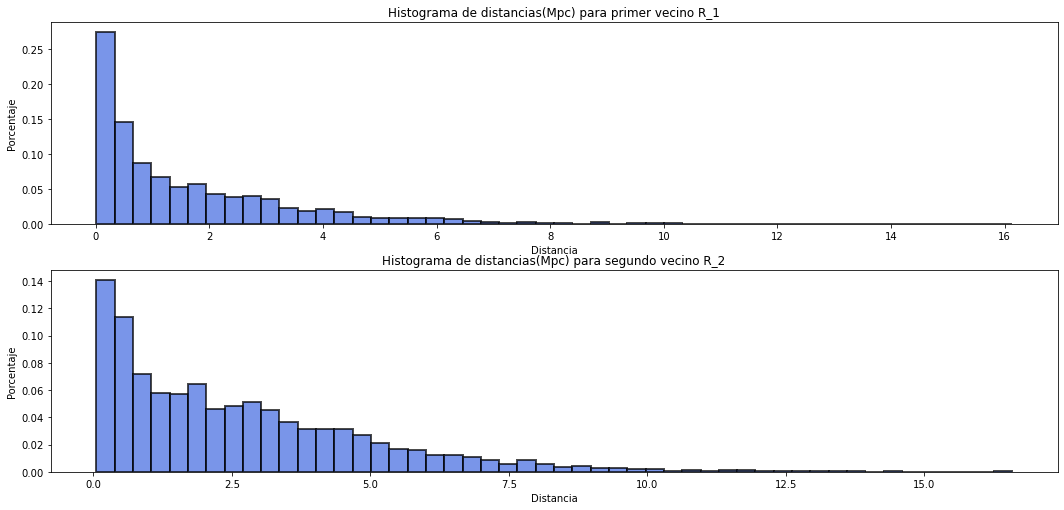

In [17]:
figure, axes = plt.subplots(2,figsize=(15,7))

xmin = np.min(R_1)
xmax = np.max(R_1)

weights=np.ones_like(R_1)/float(len(R_1))
axes[0].hist(R_1,bins=50,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[0].set_title('Histograma de distancias(Mpc) para primer vecino R_1')
axes[0].set_xlabel('Distancia')
axes[0].set_ylabel('Porcentaje')

figure.tight_layout()

xmin = np.min(R_2)
xmax = np.max(R_2)

weights=np.ones_like(R_2)/float(len(R_2))
axes[1].hist(R_2,bins=50,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[1].set_title('Histograma de distancias(Mpc) para segundo vecino R_2')
axes[1].set_xlabel('Distancia')
axes[1].set_ylabel('Porcentaje')


plt.savefig('Histograma_distancias.png')


plt.show()

In [18]:
var_1 = DATA['r_sep_1']
var_2 = DATA['r_sep_2']

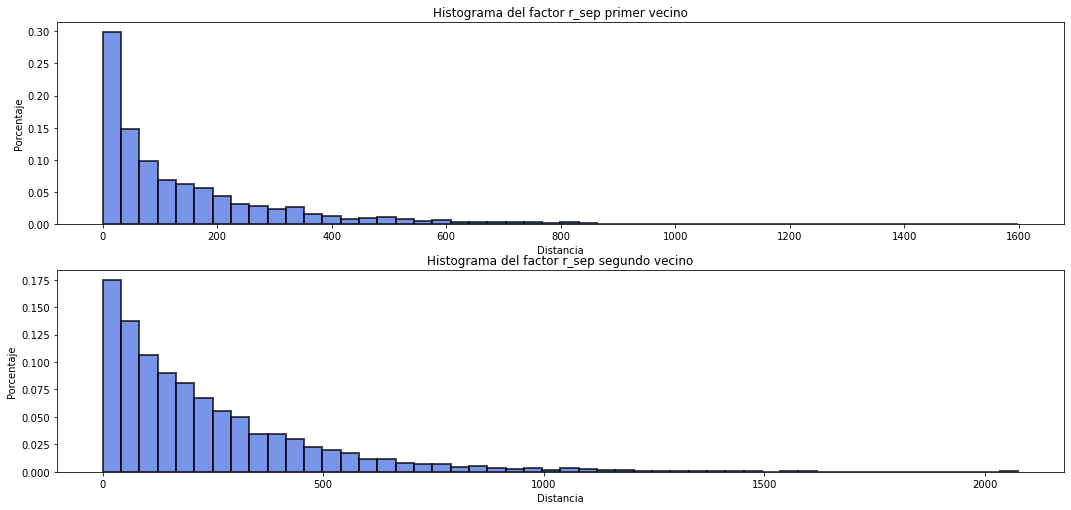

In [19]:
figure, axes = plt.subplots(2,figsize=(15,7))

xmin = np.min(var_1)
xmax = np.max(var_1)

weights=np.ones_like(var_1)/float(len(var_1))
axes[0].hist(var_1,bins=50,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[0].set_title('Histograma del factor r_sep primer vecino')
axes[0].set_xlabel('Distancia')
axes[0].set_ylabel('Porcentaje')

figure.tight_layout()

xmin = np.min(var_2)
xmax = np.max(var_2)

weights=np.ones_like(var_2)/float(len(var_2))
axes[1].hist(var_2,bins=50,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[1].set_title('Histograma del factor r_sep segundo vecino')
axes[1].set_xlabel('Distancia')
axes[1].set_ylabel('Porcentaje')

plt.savefig('Histograma_r_sep.png')


plt.show()

In [20]:
mask_1 = (DATA['mu_1']<20)
mask_2 = (DATA['mu_2']<20)

var_1 = DATA['mu_1'][mask_1]
var_2 = DATA['mu_2'][mask_2]

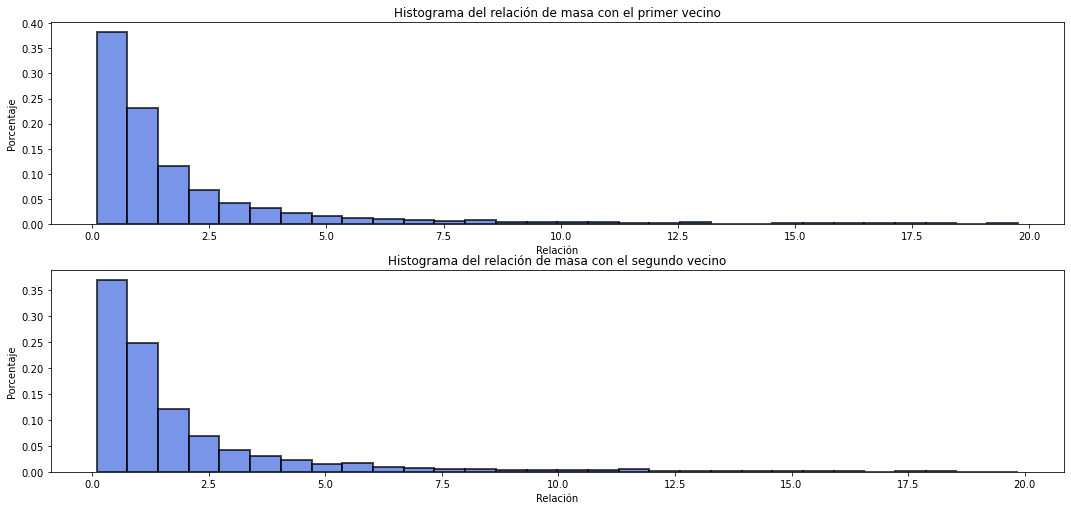

In [21]:
figure, axes = plt.subplots(2,figsize=(15,7))

xmin = np.min(var_1)
xmax = np.max(var_1)

weights=np.ones_like(var_1)/float(len(var_1))
axes[0].hist(var_1,bins=30,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[0].set_title('Histograma del relación de masa con el primer vecino')
axes[0].set_xlabel('Relación')
axes[0].set_ylabel('Porcentaje')

figure.tight_layout()

xmin = np.min(var_2)
xmax = np.max(var_2)

weights=np.ones_like(var_2)/float(len(var_2))
axes[1].hist(var_2,bins=30,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[1].set_title('Histograma del relación de masa con el segundo vecino')
axes[1].set_xlabel('Relación')

plt.savefig('Histograma_relacion_masa.png')

axes[1].set_ylabel('Porcentaje')

plt.show()

In [22]:
var_1 = DATA['N_2']

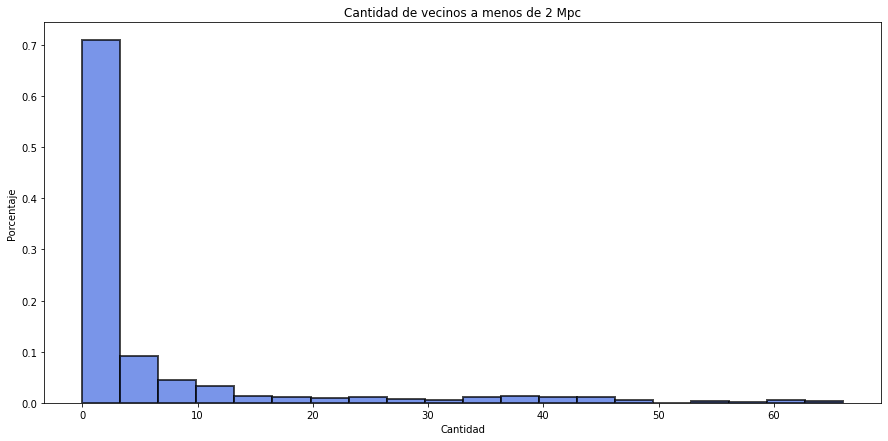

In [23]:
figure, axes = plt.subplots(1,figsize=(15,7))

xmin = np.min(var_1)
xmax = np.max(var_1)

weights=np.ones_like(var_1)/float(len(var_1))
axes.hist(var_1,bins=20,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes.set_title('Cantidad de vecinos a menos de 2 Mpc')
axes.set_xlabel('Cantidad')
axes.set_ylabel('Porcentaje')

plt.savefig('Histograma_cantidad_vecinos.png')

plt.show()

In [24]:
DATA

,GalaxyID_test,GroupID_test,GalaxyID_V1,GalaxyID_V2,R_1,R_2,r_sep_1,r_sep_2,mu_1,mu_2,N_2
0,9498012,28000000000002,9532694,3461244,0.505941,0.518791,40.259414,48.797400,0.649263,0.125630,35
1,9508202,28000000000002,9562859,14910180,0.257705,0.463580,21.223224,33.711917,0.315459,0.823968,3
2,9512113,28000000000002,3467928,9554089,0.150475,0.231956,13.328678,18.674313,0.120308,0.314345,34
3,9517736,28000000000002,9537911,9542932,0.423763,0.677967,37.490817,56.695098,1.999591,1.722059,35
4,9519365,28000000000002,9542932,9539937,0.634224,0.952579,38.135130,67.823802,0.795587,0.615451,34
...,...,...,...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,18478750,18181888,1.911730,3.737239,212.966353,260.881095,2.058146,2.369121,1
3634,10859653,28000000002570,9779252,9744960,1.526021,5.217671,148.669482,531.640719,2.014763,1.325153,1
3635,11104654,28000000002905,9034191,10942165,1.503464,2.124332,167.615303,244.177300,1.657043,0.965701,1
3636,11247394,28000000003127,18043220,13249045,2.053687,2.693730,123.996389,183.269247,4.079843,1.619644,0


## 12) Graficar r2 vs r1 (scatter plot + medianas + percentiles 25th y 75th).

In [25]:
xvar = DATA['R_1']
yvar = DATA['R_2']

In [26]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

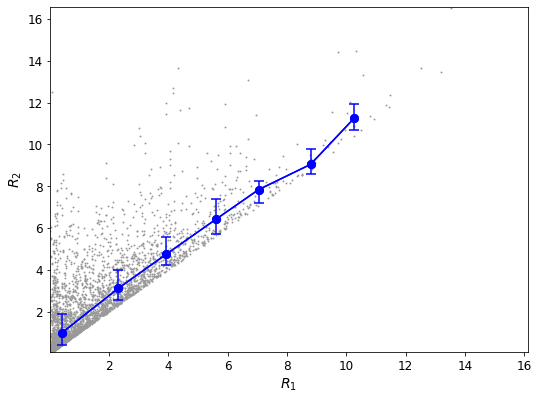

In [27]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(xvar),max(xvar))
ylim=(min(yvar),max(yvar))

xlabel=r'$R_{1}$'
ylabel=r'$R_{2}$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# ax.add_artist(leg1)
plt.savefig('scatter_R_1vsR_2.png')


plt.show()

## 13) Graficar scatter plot de r2 vs r1, coloreando según N2.

In [28]:
xvar = DATA['R_1']
yvar = DATA['R_2']

In [29]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [30]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='N_2'
colors_var_label=r'$N_{2}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-30-e8e913fb780f>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



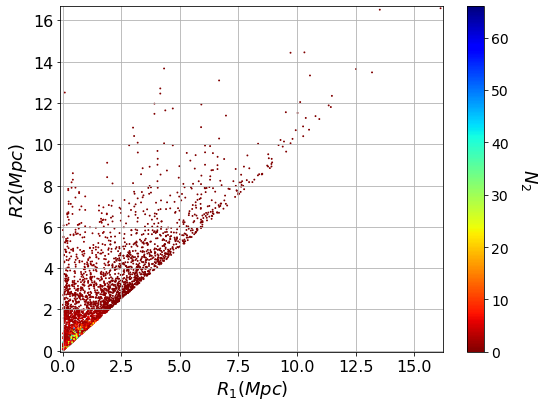

In [31]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

## 14) Graficar scatter plot de r2 vs r1, coloreando según rsep2.

In [32]:
xvar = DATA['R_1']
yvar = DATA['R_2']

xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [33]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='r_sep_1'
colors_var_label=r'$r_{Sep1}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-33-c34458be7fe9>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



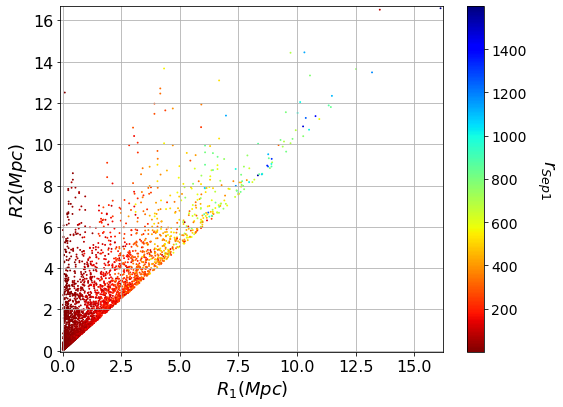

In [34]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

plt.savefig('scatter_R_1vsR_2(color_r_sep1).png')
plt.show()

In [35]:
xvar = DATA['R_1']
yvar = DATA['R_2']

xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [36]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='r_sep_2'
colors_var_label=r'$r_{Sep2}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-36-18a2fea8d121>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



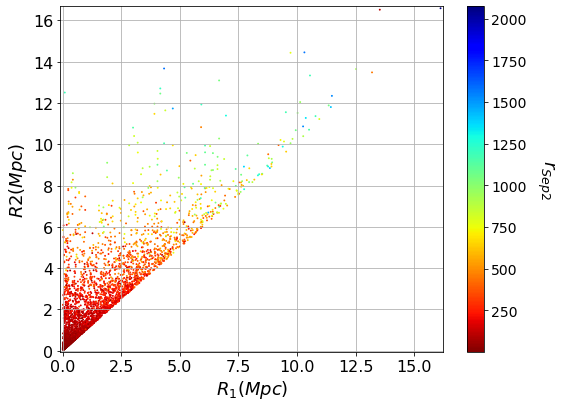

In [37]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

plt.savefig('scatter_R_1vsR_2(color_r_sep2).png')
plt.show()

## 15) Graficar  scatter plot de r2 vs r1, coloreando según μBGT.

In [53]:
xvar = DATA['R_1']
yvar = DATA['R_2']

xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [49]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='mu_1'
colors_var_label=r'$\mu_{1}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-49-14aca0c44117>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



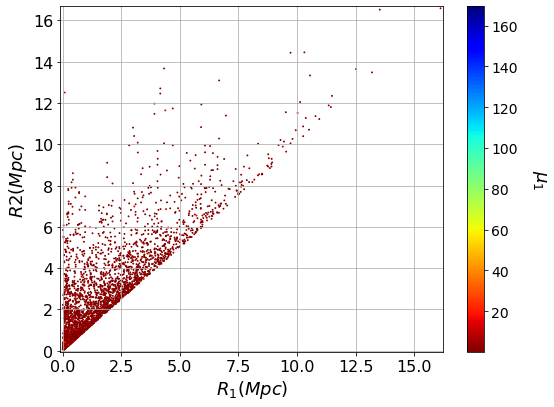

In [50]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

plt.savefig('scatter_R_1vsR_2(color_mu1).png')
plt.show()

In [54]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='mu_2'
colors_var_label=r'$\mu_{2}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-54-2acb41f497fa>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



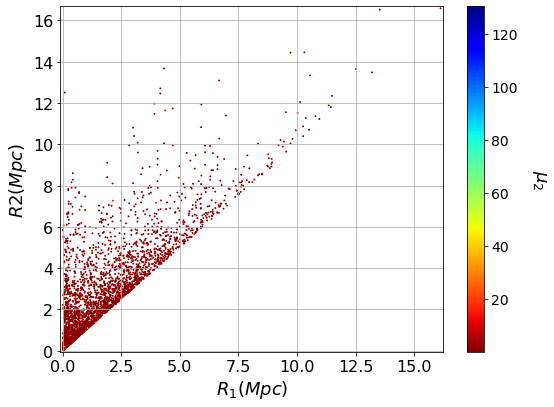

In [55]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

plt.savefig('scatter_R_1vsR_2(color_mu2).png')
plt.show()

In [79]:
DATA

,GalaxyID_test,GroupID_test,GalaxyID_V1,GalaxyID_V2,R_1,R_2,r_sep_1,r_sep_2,mu_1,mu_2,N_2
0,9498012,28000000000002,9532694,3461244,0.505941,0.518791,40.259414,48.797400,0.649263,0.125630,35
1,9508202,28000000000002,9562859,14910180,0.257705,0.463580,21.223224,33.711917,0.315459,0.823968,3
2,9512113,28000000000002,3467928,9554089,0.150475,0.231956,13.328678,18.674313,0.120308,0.314345,34
3,9517736,28000000000002,9537911,9542932,0.423763,0.677967,37.490817,56.695098,1.999591,1.722059,35
4,9519365,28000000000002,9542932,9539937,0.634224,0.952579,38.135130,67.823802,0.795587,0.615451,34
...,...,...,...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,18478750,18181888,1.911730,3.737239,212.966353,260.881095,2.058146,2.369121,1
3634,10859653,28000000002570,9779252,9744960,1.526021,5.217671,148.669482,531.640719,2.014763,1.325153,1
3635,11104654,28000000002905,9034191,10942165,1.503464,2.124332,167.615303,244.177300,1.657043,0.965701,1
3636,11247394,28000000003127,18043220,13249045,2.053687,2.693730,123.996389,183.269247,4.079843,1.619644,0
